In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Column names (assuming these are the columns in the dataset)
retail_columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
# Load the dataset
retail_df = pd.read_csv('Online Retail.csv', encoding='latin-1', names=retail_columns, skiprows=1)

In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Data type conversion
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [ ]:
# Check for missing values
missing_values = retail_df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [ ]:
# Removing duplicates
retail_df = retail_df.drop_duplicates()

In [ ]:
# Summary statistics for numerical columns
summary_stats = retail_df.describe()
print(summary_stats)

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [ ]:
# Value counts for categorical data
country_counts = retail_df['Country'].value_counts()
print(country_counts)

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [ ]:
stockcode_counts = retail_df['StockCode'].value_counts()
print(stockcode_counts)

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: count, Length: 4070, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

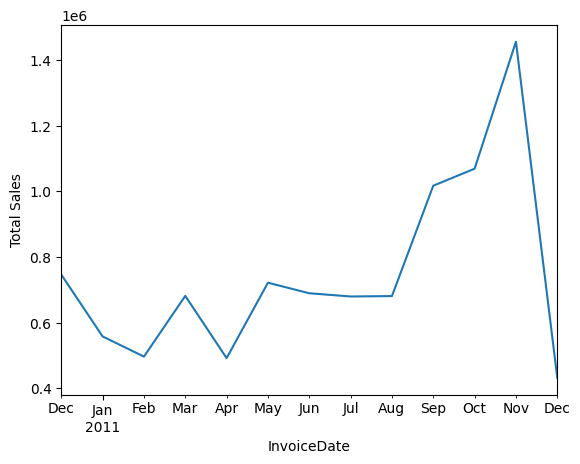

In [ ]:
# Time Series Analysis (example: total sales over time)
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot()
plt.ylabel('Total Sales')
plt.show()

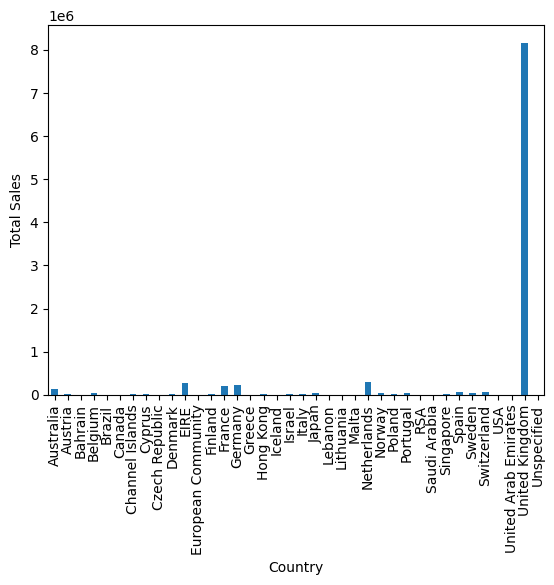

In [ ]:
# Country-wise Analysis
retail_df.groupby('Country')['TotalPrice'].sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Correlation Matrix
retail_df.corr(numeric_only=True)

,Quantity,UnitPrice,CustomerID,TotalPrice
Quantity,1.000000,-0.001241,-0.003457,0.886712
UnitPrice,-0.001241,1.000000,-0.004524,-0.162043
CustomerID,-0.003457,-0.004524,1.000000,-0.002130
TotalPrice,0.886712,-0.162043,-0.002130,1.000000


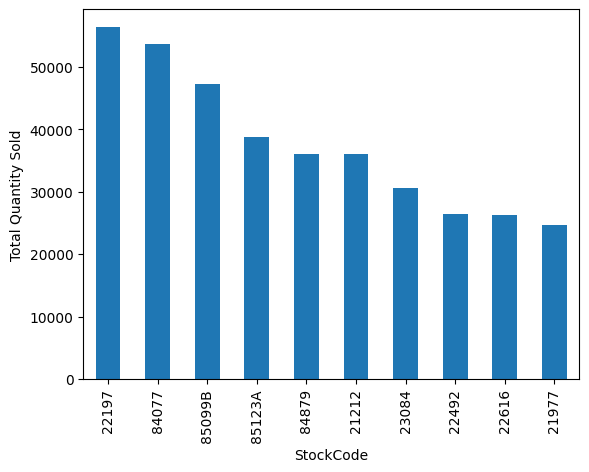

In [ ]:
# Top Selling Products
top_products = retail_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.ylabel('Total Quantity Sold')
plt.show()

In [ ]:
# Create TF-IDF matrix for item descriptions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess data: remove missing values, aggregate descriptions by StockCode
retail_df.dropna(subset=['Description', 'CustomerID'], inplace=True)
item_profiles = retail_df.groupby('StockCode')['Description'].apply(' '.join).reset_index()

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(item_profiles['Description'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# Function to recommend items for a user
def recommend_items_for_user(user_id, num_recommendations=5):
    # Filter user's purchase history
    bought_items = retail_df[retail_df['CustomerID'] == user_id]['StockCode'].unique()

    # Calculate similarity between user's bought items and all items
    bought_items_profile = sum([tfidf_matrix[item_profiles['StockCode'] == item] for item in bought_items])
    cosine_similarities = cosine_similarity(bought_items_profile, tfidf_matrix).flatten()

    # Exclude already bought items and get top recommendations
    similar_indices = [i for i in cosine_similarities.argsort()[::-1] if item_profiles['StockCode'][i] not in bought_items][:num_recommendations]
    return item_profiles['StockCode'].iloc[similar_indices]

In [ ]:
# Example: Get recommendations for a user
user_id = 17850  # replace with a real CustomerID from your dataset
recommended_items = recommend_items_for_user(user_id)
print(recommended_items)

1108    22216
335     21066
757     21733
2778    82484
1929    23090
Name: StockCode, dtype: object


In [ ]:
# Function to recommend similar items
def recommend_similar_items(item_id, num_recommendations=5):
    # Find the index of the given item
    item_idx = item_profiles.index[item_profiles['StockCode'] == item_id].tolist()[0]

    # Compute cosine similarities
    cosine_similarities = cosine_similarity(tfidf_matrix[item_idx:item_idx+1], tfidf_matrix).flatten()

    # Get top similar items excluding the item itself
    similar_indices = [i for i in cosine_similarities.argsort()[::-1] if i != item_idx][:num_recommendations]
    return item_profiles['StockCode'].iloc[similar_indices]

# Example: Get recommendations for an item
item_id = '85123A'  # replace with a real StockCode from your dataset
similar_items = recommend_similar_items(item_id)
print(similar_items)

757      21733
3126    84970S
807      21814
3248     85118
3131     84978
Name: StockCode, dtype: object
